In [8]:
import ipywidgets as widgets
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import imageio.v3 as iio
import os, glob

In [9]:
import glob

def list_dicoms(dicom_dir,filename_expression = '*.dcm'):
    filenames = glob.glob(os.path.join(dicom_dir,filename_expression))
    filenames = sorted(filenames)
    print(f'There are {len(filenames)} DICOMs (slices) in the directory "{dicom_dir}"')
    return filenames

In [10]:
DICOM_DIR = '/home/ERASMUSMC/099035/Documents/DICOMfiles'
filenames = list_dicoms(DICOM_DIR)
filenames_size = len(filenames)

There are 87 DICOMs (slices) in the directory "/home/ERASMUSMC/099035/Documents/DICOMfiles"


In [11]:
slice = imageio.imread(filenames[0])

In [16]:
#ApplicationSetupSequence[0].ChannelSequence[0].BrachyControlPointSequence[41].ControlPoint3DPosition
slice.meta

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'),
      ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'),
      ('SOPInstanceUID',
       '1.2.826.0.1.3680043.2.968.3.40779735.15284.1693921063.137'),
      ('StudyDate', '19000101'),
      ('SeriesDate', '19000101'),
      ('AcquisitionDate', '19000101'),
      ('ContentDate', '19000101'),
      ('StudyTime', '172748.187000 '),
      ('SeriesTime', '175224.639000 '),
      ('AcquisitionTime', '175219.370000 '),
      ('ContentTime', '175219.370000 '),
      ('Modality', 'CT'),
      ('Manufacturer', 'SIEMENS'),
      ('StudyDescription', 'Specials^BT_Prostaat (Adult)'),
      ('SeriesDescription', 'BT Prostaat  3.0  B30f'),
      ('PatientName', 'PT01'),
      ('PatientID', 'PT01'),
      ('PatientBirthDate', '18280527'),
      ('PatientSex', 'M '),
      ('StudyInstanceUID',
       '1.2.826.0.1.3680043.2.968.3.40779735.15284.1693921063.131'),
      ('SeriesInstanceUID',
       '1.2.826.0.1.3680043.2.968.3.40779735.15284.1693921063.136'),
 

In [6]:
slice.meta['PixelData']

b'Data converted to numpy array, raw data removed to preserve memory'

In [7]:
# The 2 dimensional array contains numbers where each
# number represents the pixel value in Hounsfield Unit(HU)
slice.meta['shape']

(512, 512)

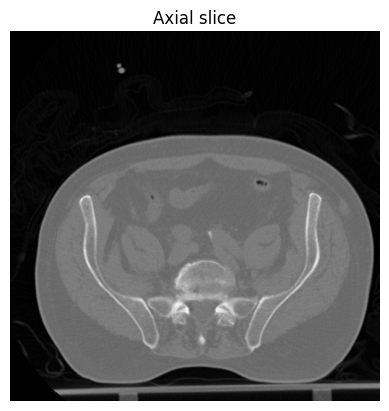

In [8]:
# Show the image with a gray colormap
plt.imshow(slice, cmap = 'gray')
plt.axis('off')
plt.title('Axial slice')
plt.show()

In [9]:
Coronal_pixel_space,Saggital_pixel_space = slice.meta['PixelSpacing']
print(f'Pixel spacing values:\n\tCoronal = {Coronal_pixel_space}mm\n\tSaggital = {Saggital_pixel_space}mm')

Pixel spacing values:
	Coronal = 0.744140625mm
	Saggital = 0.744140625mm


interactive(children=(IntSlider(value=50, description='axial_slice', max=86), Output()), _dom_classes=('widget…

<function __main__.axial_slicer(axial_slice=50)>

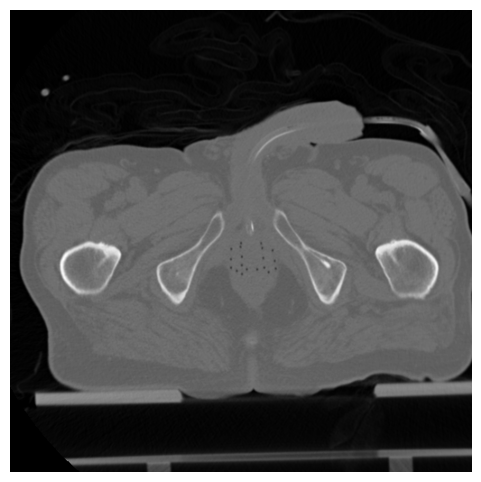

In [11]:
# Read all slices
allslices = []
for i in range(0,len(filenames)):
    allslices.append(imageio.imread(filenames[i]))
# Define the function that shows the images of the specified slice number.
# It starts with the 50th slice. And you can scroll over any slice
# using the slider.
def axial_slicer(axial_slice=50):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    # Show the image of the specified slice number in 'gray' color-map
    # and axial aspect ratio
    #slice = imageio.imread(filenames[axial_slice])
    ax.imshow(allslices[axial_slice], cmap='gray')
    # Don't show the axis
    ax.axis('off')


# Add a slider that starts with 0 and ends at the number of slices
widgets.interact(axial_slicer,axial_slice=(0,filenames_size-1))
